<a href="https://colab.research.google.com/github/ABDELLAH-B/Morocco-CO2-Emissions-history/blob/main/Morocco_environment_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# ============================================================
# 1. Imports
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
# ============================================================
# 2. List of open datasets (URLs)
# ============================================================

datasets = {
    "Morocco_Temperature": "https://raw.githubusercontent.com/datasets/global-temp/master/data/monthly.csv",
    "Morocco_CO2": "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv",
    "Organic_Agriculture_Morocco": "https://raw.githubusercontent.com/fao-org/faostat-data/master/data/OrganicAgriculture.csv"
}

dfs = {}
for name, url in datasets.items():
    try:
        df = pd.read_csv(url)
        dfs[name] = df
        print(f"Loaded {name}, shape: {df.shape}")
    except Exception as e:
        print(f"Failed to load {name}: {e}")


Loaded Morocco_Temperature, shape: (3823, 3)
Loaded Morocco_CO2, shape: (50407, 79)
Failed to load Organic_Agriculture_Morocco: HTTP Error 404: Not Found


In [6]:
# ============================================================
# 3. Quick preview of datasets
# ============================================================

for name, df in dfs.items():
    print(f"\n{name}:")
    display(df.head())



Morocco_Temperature:


,Source,Year,Mean
0,gcag,1850-01,-0.6746
1,gcag,1850-02,-0.3334
2,gcag,1850-03,-0.5913
3,gcag,1850-04,-0.5887
4,gcag,1850-05,-0.5088



Morocco_CO2:


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# ============================================================
# 4. Filter / Clean data for Morocco
# ============================================================

# Example: CO2 dataset from Our World In Data
co2_df = dfs["Morocco_CO2"]
morocco_co2 = co2_df[co2_df["country"]=="Morocco"][["year","co2","co2_per_capita"]].sort_values("year")
morocco_co2.reset_index(drop=True, inplace=True)
morocco_co2.tail()


,year,co2,co2_per_capita
170,2020,64.542,1.764
171,2021,70.275,1.902
172,2022,69.779,1.869
173,2023,68.961,1.829
174,2024,69.062,1.814


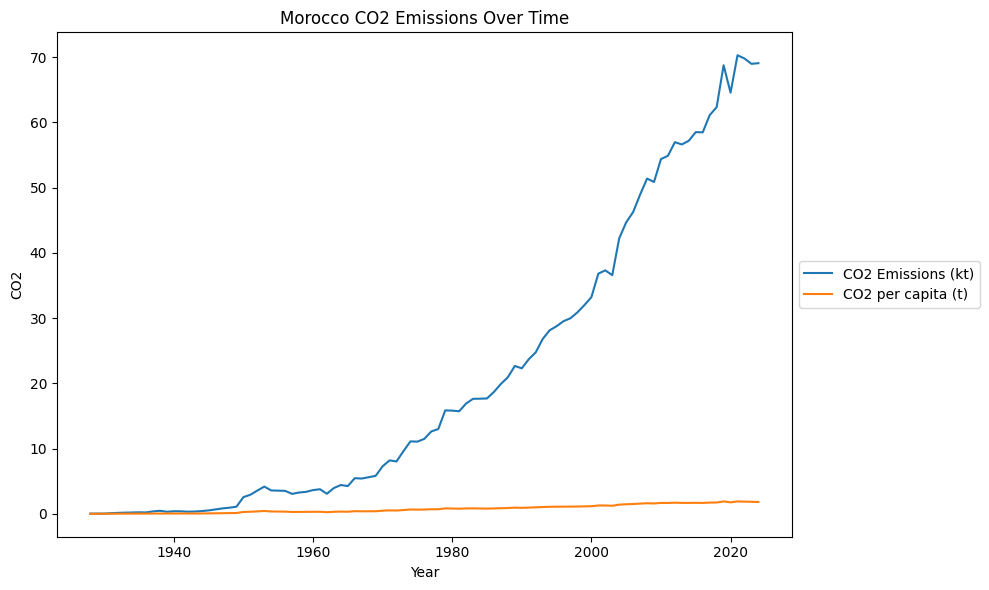

In [9]:
# ============================================================
# 5. Plot CO2 over time with legend outside
# ============================================================

plt.figure(figsize=(10,6))
plt.plot(morocco_co2["year"], morocco_co2["co2"], label="CO2 Emissions (kt)")
plt.plot(morocco_co2["year"], morocco_co2["co2_per_capita"], label="CO2 per capita (t)")

plt.xlabel("Year")
plt.ylabel("CO2")
plt.title("Morocco CO2 Emissions Over Time")

# Legend outside
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [10]:
# ============================================================
# 6. Export cleaned data for GitHub
# ============================================================

morocco_co2.to_csv("morocco_co2_cleaned.csv", index=False)
print("Exported morocco_co2_cleaned.csv")


Exported morocco_co2_cleaned.csv
